In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [38]:
img = image.load_img("train/happy/1.jpg")

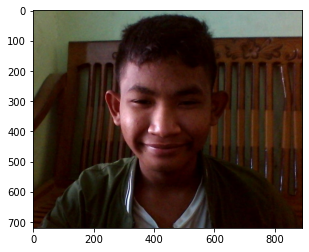

In [39]:
plt.imshow(img)

In [40]:
cv2.imread("train/happy/1.jpg").shape

(720, 891, 3)

In [41]:
train = ImageDataGenerator(rescale= 1/255)
v = ImageDataGenerator(rescale= 1/255)

In [42]:
t_ds = train.flow_from_directory('train/',
                                target_size= (200,200),
                                batch_size = 3,
                                class_mode = 'binary')
v_ds = v.flow_from_directory('v/',
                             target_size= (200,200),
                             batch_size= 3,
                             class_mode= 'binary')

Found 32 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [43]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape =(200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation= 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ])

In [44]:
model.compile(loss= 'binary_crossentropy',
             optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
             metrics =['accuracy'])

In [45]:
model_fit = model.fit(t_ds,
                     steps_per_epoch = 3,
                     epochs = 30,
                     validation_data = v_ds)

Epoch 1/30
3/3 [==============================] - 8s 2s/step - loss: 2.8634 - accuracy: 0.5000 - val_loss: 0.7214 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 4s 2s/step - loss: 1.1999 - accuracy: 0.4444 - val_loss: 0.7418 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 4s 2s/step - loss: 0.6383 - accuracy: 0.6250 - val_loss: 0.6645 - val_accuracy: 0.6562
Epoch 4/30
3/3 [==============================] - 5s 2s/step - loss: 0.6602 - accuracy: 0.6667 - val_loss: 0.6957 - val_accuracy: 0.5938
Epoch 5/30
3/3 [==============================] - 5s 2s/step - loss: 0.6539 - accuracy: 0.6250 - val_loss: 1.4610 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 5s 2s/step - loss: 1.3771 - accuracy: 0.6667 - val_loss: 0.5781 - val_accuracy: 0.7188
Epoch 7/30
3/3 [==============================] - 4s 2s/step - loss: 0.7347 - accuracy: 0.3750 - val_loss: 0.6237 - val_accuracy: 0.6250
Epoch 8/30
3/3 [=========================

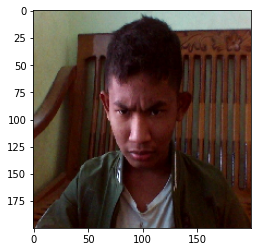

You are not Happy


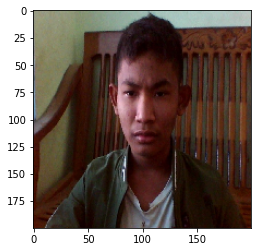

You are not Happy


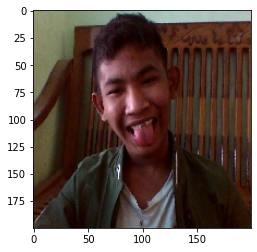

You are Happy


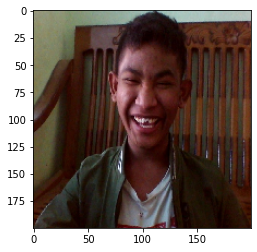

You are not Happy


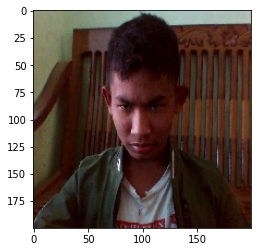

You are not Happy


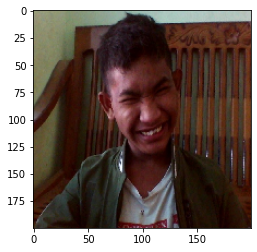

You are Happy


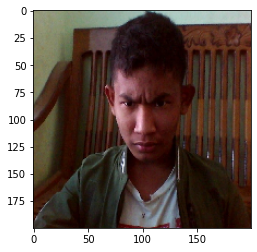

You are not Happy


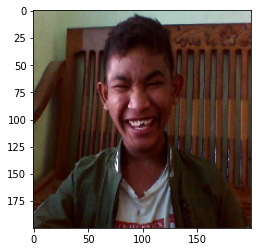

You are Happy


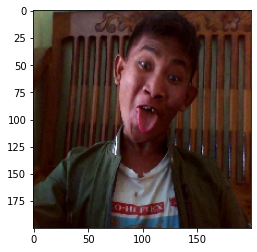

You are not Happy


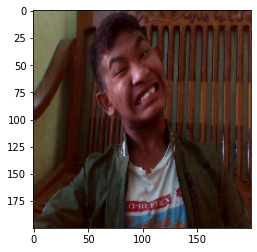

You are Happy


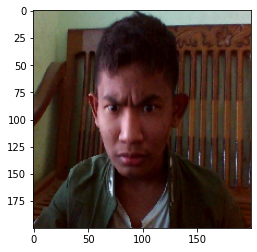

You are not Happy


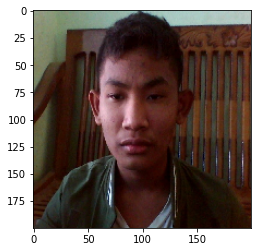

You are not Happy


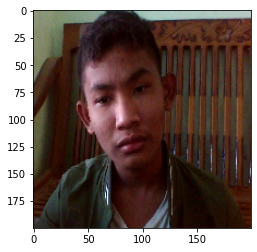

You are not Happy


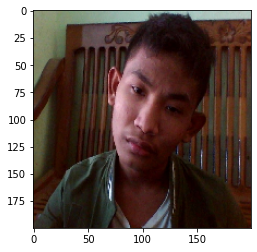

You are not Happy


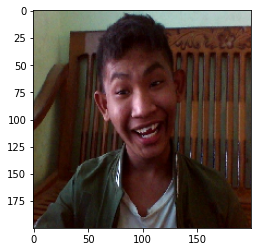

You are Happy


In [46]:
dir_path = './basedata/test'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+ "//" + i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis =0)
    images = np.vstack([X])
    
    val = model.predict(images)
    if val == 0:
        print("You are Happy")
    else:
        print("You are not Happy")
    

In [23]:
v_ds.class_indices

{'happy': 0, 'unhappy': 1}